03-2
선형 회귀

In [1]:
import numpy as np

k-최근접 이웃의 한계


In [4]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [5]:
#  훈련 세트와 테스트 세트로 나누기.
from sklearn.model_selection import train_test_split

In [6]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [7]:
# 훈련 세트와 테스트 테스를 2차원 배열로 바꾸기.
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [9]:
#  최근접 이웃개수를 3개로 하는 모델 훈련
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [11]:
# 길이가 50cm 인 농어의 무게를 예측.
print(knr.predict([[50]]))

[1033.33333333]


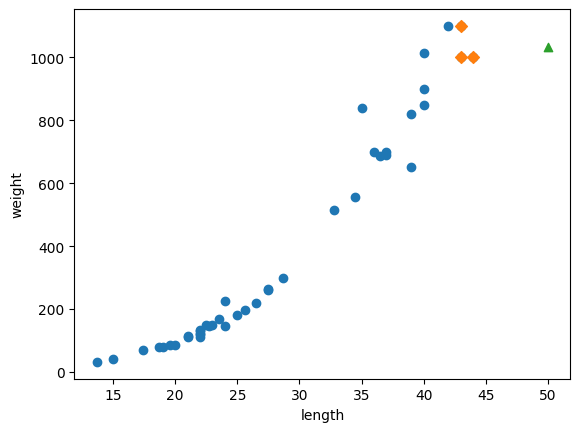

In [13]:
#  훈련세트와 50cm 농어, 농어의 최근접 이웃을 산점도에 표시하기.
import matplotlib.pyplot as plt
# 50cm 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[50]])
# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
#  50cm 농어 데이터
plt.scatter(50,1033,marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [14]:
# 이웃 샘플의 타킷의 평균구하기
print(np.mean(train_target[indexes]))

1033.3333333333333


In [15]:
# 100cm 농어의 무게 예측하기
print(knr.predict([[100]]))

[1033.33333333]


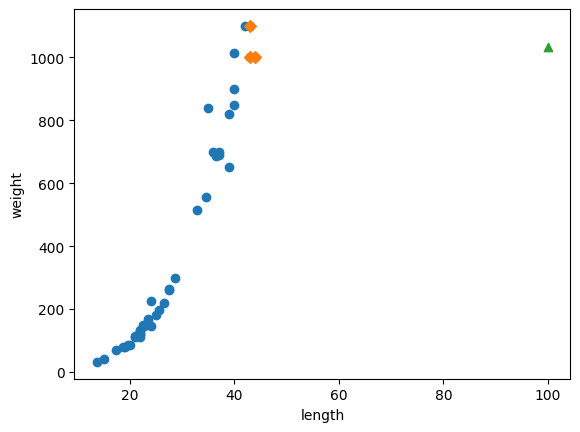

In [16]:
# 그래프로 확인하기.
# 100cm 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[100]])
#  훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)
#  훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker ='D')
# 100cm 농어 데이터
plt.scatter(100,1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

선형 회귀   

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [18]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


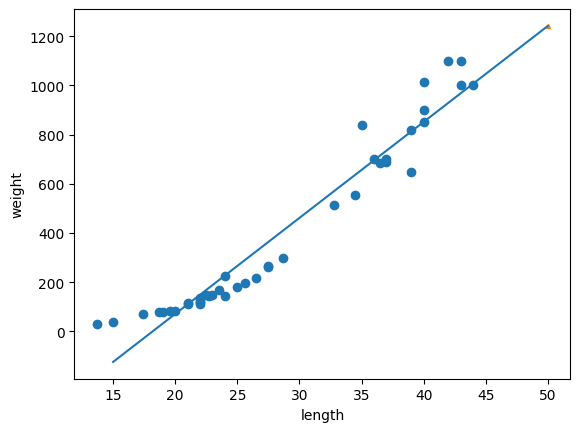

In [22]:
plt.scatter(train_input, train_target)

plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50 *lr.coef_ + lr.intercept_])

plt.scatter(50,1241,8, marker ='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [21]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


다항 회귀

In [23]:
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input **2, test_input))

In [24]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [25]:
lr= LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2,50]]))

[1573.98423528]


In [26]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


다항회귀

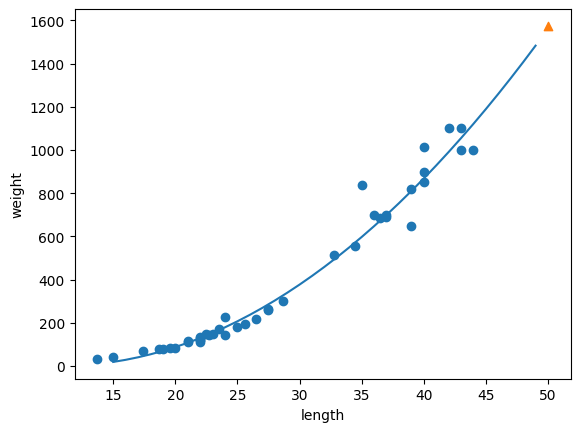

In [27]:
#  구간별 직선을 그리기 위해 15에서 49까지 정수 배열 만들기
point = np.arange(15,50)

#  훈련세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프 그리기
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter(50,1574,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [28]:
# 훈련세트와 테스트 세트의 R^2 점수 평가
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
